In [4]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from itertools import count
import pickle
import sys
sys.path.append('../..')
import brian_utils.postproc as bup
from brian2 import *

In [5]:
path = '/research/harris/prebot_opioid_model'

### Panel A

In [3]:
def plot_pop_rate(rate10, rate30, rate50, fignum):
    ctrl_t = (30,60)
    damgo_t = (70,100)
    pert_t = (190,220)

    binsize = 25 * ms
    smoothed_pop_rate_10 = bup.smooth_saved_rate(rate10, binsize)
    burst_stats_10 = bup.pop_burst_stats(rate10['t'], smoothed_pop_rate_10, height = 4, prominence = 10)
    smoothed_pop_rate_30 = bup.smooth_saved_rate(rate30, binsize)
    burst_stats_30 = bup.pop_burst_stats(rate30['t'], smoothed_pop_rate_30, height = 4, prominence = 10)
    smoothed_pop_rate_50 = bup.smooth_saved_rate(rate50, binsize)
    burst_stats_50 = bup.pop_burst_stats(rate50['t'], smoothed_pop_rate_50, height = 4, prominence = 10)
    
    fig, ax = plt.subplots(2,5, figsize=(10,4), sharey=True)
    i = 0
    for t in [ctrl_t, damgo_t, pert_t, pert_t, pert_t]:
        ax[0,i].set_xlim(t)
        ax[0,i].set_xticks([])
        ax[0,i].set_ylim(0,50)
        ax[0,i].set_yticks(np.arange(0,51,10))
        
        if i < 3:
            ax[0,i].plot(rate10['t'], smoothed_pop_rate_10, 'k', linewidth=1, alpha=0.5)
            ax[0,i].plot(burst_stats_10['Peak Times'], smoothed_pop_rate_10[burst_stats_10['Peak Samples']], '.', c = 'tab:gray')
        elif i == 3:
            ax[0,i].plot(rate30['t'], smoothed_pop_rate_30, 'k', linewidth=1, alpha=0.5)
            ax[0,i].plot(burst_stats_30['Peak Times'], smoothed_pop_rate_30[burst_stats_30['Peak Samples']], '.', c = 'tab:gray')
        elif i == 4:
            ax[0,i].plot(rate50['t'], smoothed_pop_rate_50, 'k', linewidth=1, alpha=0.5)
            ax[0,i].plot(burst_stats_50['Peak Times'], smoothed_pop_rate_50[burst_stats_50['Peak Samples']], '.', c = 'tab:gray')
        i+=1
        
    ax[0,0].set_xlabel('Time (30 s)')
    ax[0,0].set_ylabel('FR\n(Hz/cell)')

    for j,burst in burst_stats_10.iterrows():
        if burst['Onset Times'] >= 30. and burst['Offset Times'] < 60:
            ax[1,0].plot(rate10['t'], smoothed_pop_rate_10, 'b', linewidth=1, alpha=0.5, c = 'k')
            ax[1,0].plot(burst_stats_10['Peak Times'], smoothed_pop_rate_10[burst_stats_10['Peak Samples']], '.', c = 'tab:gray', markersize=10)
            ax[1,0].axvline(x = burst['Peak Times'], linestyle = '--', c = 'k')
            ax[1,0].axvline(x = burst['Onset Times'], linestyle = '--', c = 'silver', alpha = 0.2)
            ax[1,0].axvline(x = burst['Offset Times'], linestyle = '--', c = 'silver', alpha = 0.2)
            ax[1,0].set_xlim(burst['Peak Times']-1.5, burst['Peak Times']+1.5)
            ax[1,0].set_ylabel('FR\n (Hz/cell)')
            ax[1,0].set_xticks([])
            ax[1,0].set_yticks(np.arange(0,41,10))
            ax[1,0].set_ylim(0,40)
            ax[1,0] = ax[1,0].twiny()

        if burst['Onset Times'] >= 70. and burst['Offset Times'] < 100:
            ax[1,1].plot(rate10['t'], smoothed_pop_rate_10, 'b', linewidth=1, alpha=0.5, c = 'k')
            ax[1,1].plot(burst_stats_10['Peak Times'], smoothed_pop_rate_10[burst_stats_10['Peak Samples']], '.', c = 'tab:gray', markersize=10)
            ax[1,1].axvline(x = burst['Peak Times'], linestyle = '--', c = 'k')
            ax[1,1].axvline(x = burst['Onset Times'], linestyle = '--', c = 'silver', alpha = 0.5)
            ax[1,1].axvline(x = burst['Offset Times'], linestyle = '--', c = 'silver', alpha = 0.5)
            ax[1,1].set_xlim(burst['Peak Times']-1.5, burst['Peak Times']+1.5)
            ax[1,1].set_xticks([])
            ax[1,1].set_yticks([])
            ax[1,1] = ax[1,1].twiny()

        if burst['Onset Times'] >= 190. and burst['Offset Times'] < 220:
            ax[1,2].plot(rate10['t'], smoothed_pop_rate_10, 'b', linewidth=1, alpha=0.5, c = 'k')
            ax[1,2].plot(burst_stats_10['Peak Times'], smoothed_pop_rate_10[burst_stats_10['Peak Samples']], '.', c = 'tab:gray', markersize=10)
            ax[1,2].axvline(x = burst['Peak Times'], linestyle = '--', c = 'k')
            ax[1,2].axvline(x = burst['Onset Times'], linestyle = '--', c = 'silver', alpha = 0.5)
            ax[1,2].axvline(x = burst['Offset Times'], linestyle = '--', c = 'silver', alpha = 0.5)
            ax[1,2].set_xlim(burst['Peak Times']-1.5, burst['Peak Times']+1.5)
            ax[1,2].set_xticks([])
            ax[1,2].set_yticks([])
            ax[1,2] = ax[1,2].twiny()
            
    for j,burst in burst_stats_30.iterrows():
        if burst['Onset Times'] >= 190. and burst['Offset Times'] < 220:
            ax[1,3].plot(rate30['t'], smoothed_pop_rate_30, 'b', linewidth=1, alpha=0.5, c = 'k')
            ax[1,3].plot(burst_stats_30['Peak Times'], smoothed_pop_rate_30[burst_stats_30['Peak Samples']], '.', c = 'tab:gray', markersize=10)
            ax[1,3].axvline(x = burst['Peak Times'], linestyle = '--', c = 'k')
            ax[1,3].axvline(x = burst['Onset Times'], linestyle = '--', c = 'silver', alpha = 0.5)
            ax[1,3].axvline(x = burst['Offset Times'], linestyle = '--', c = 'silver', alpha = 0.5)
            ax[1,3].set_xlim(burst['Peak Times']-1.5, burst['Peak Times']+1.5)
            ax[1,3].set_xticks([])
            ax[1,3].set_yticks([])
            ax[1,3] = ax[1,3].twiny()
    
    for j,burst in burst_stats_50.iterrows():
        if burst['Onset Times'] >= 190. and burst['Offset Times'] < 220:
            ax[1,4].plot(rate50['t'], smoothed_pop_rate_50, 'b', linewidth=1, alpha=0.5, c = 'k')
            ax[1,4].plot(burst_stats_50['Peak Times'], smoothed_pop_rate_50[burst_stats_50['Peak Samples']], '.', c = 'tab:gray', markersize=10)
            ax[1,4].axvline(x = burst['Peak Times'], linestyle = '--', c = 'k')
            ax[1,4].axvline(x = burst['Onset Times'], linestyle = '--', c = 'silver', alpha = 0.5)
            ax[1,4].axvline(x = burst['Offset Times'], linestyle = '--', c = 'silver', alpha = 0.5)
            ax[1,4].set_xlim(burst['Peak Times']-1.5, burst['Peak Times']+1.5)
            ax[1,4].set_xticks([])
            ax[1,4].set_yticks([])
            ax[1,4] = ax[1,4].twiny()

    ax[1,0].set_xlabel('Time (3 s)')
    plt.tight_layout()
    plt.savefig(f'fig{fignum}/fig{fignum}_poprate.pdf')

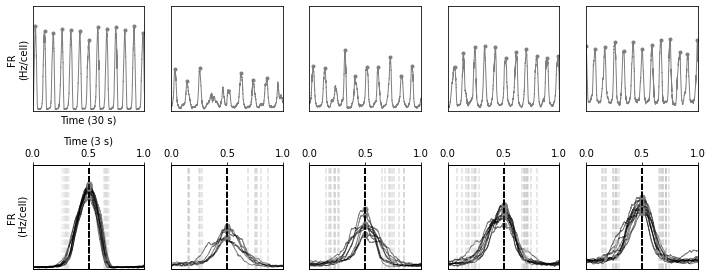

In [7]:
seed = 5
with open(f'{path}/data/gnap_mod_pkls/seed{seed}-str01_run_vars.pkl','rb') as fid:
    data = pickle.load(fid)
    rate10 = data['ratemonitor']
    
with open(f'{path}/data/gnap_mod_pkls/seed{seed}-str03_run_vars.pkl','rb') as fid:
    data = pickle.load(fid)
    rate30 = data['ratemonitor']
    
with open(f'{path}/data/gnap_mod_pkls/seed{seed}-str05_run_vars.pkl','rb') as fid:
    data = pickle.load(fid)
    rate50 = data['ratemonitor']
    
plot_pop_rate(rate10, rate30, rate50, fignum=6)

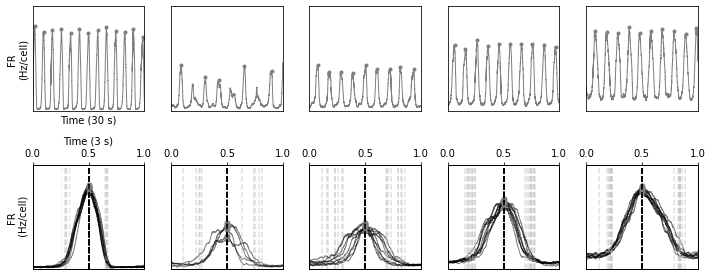

In [8]:
seed = 5
with open(f'{path}/data/gleak_mod_pkls/seed{seed}-gleak-01_vars.pkl','rb') as fid:
    data = pickle.load(fid)
    rate10 = data['ratemonitor']
    
with open(f'{path}/data/gleak_mod_pkls/seed{seed}-gleak-03_vars.pkl','rb') as fid:
    data = pickle.load(fid)
    rate30 = data['ratemonitor']
    
with open(f'{path}/data/gleak_mod_pkls/seed{seed}-gleak-05_vars.pkl','rb') as fid:
    data = pickle.load(fid)
    rate50 = data['ratemonitor']
    
plot_pop_rate(rate10, rate30, rate50, fignum=7)

### Panel B

In [54]:
def plot_freq_and_amp(pert, fignum):
    fig, ax = plt.subplots(2,1, figsize=(10,4), sharex=True)
    freqs = pd.read_csv(f'{path}/{pert}_mod_sim/burst_stats/{pert}_mod_avg_freqs.csv')
    amps = pd.read_csv(f'{path}/{pert}_mod_sim/burst_stats/{pert}_mod_avg_amps.csv')
    
    if pert == 'gleak':
        order = ['Control', 'DAMGO', r'DAMGO + $G_{Leak} \times 0.9$', r'DAMGO + $G_{Leak} \times 0.7$', r'DAMGO + $G_{Leak} \times 0.5$']
    else:
        order = ['Control', 'DAMGO', r'DAMGO + $G_{NaP} \times 1.1$', r'DAMGO + $G_{NaP} \times 1.3$', r'DAMGO + $G_{NaP} \times 1.5$']
        
    sns.stripplot(data=freqs, x='Condition', y='Frequency', ax=ax[0], order=order)
    sns.stripplot(data=amps, x='Condition', y='Burst Amp', ax=ax[1], order=order)

    sns.boxplot(showmeans=True,
                meanline=True,
                meanprops={'color': 'k', 'ls': '-', 'lw': 1},
                medianprops={'visible': False},
                whiskerprops={'visible': False},
                zorder=1,
                x='Condition',
                y='Frequency',
                data=freqs,
                showfliers=False,
                showbox=False,
                showcaps=False,
                ax=ax[0],
                order=order)

    sns.boxplot(showmeans=True,
                meanline=True,
                meanprops={'color': 'k', 'ls': '-', 'lw': 1},
                medianprops={'visible': False},
                whiskerprops={'visible': False},
                zorder=1,
                x='Condition',
                y='Burst Amp',
                data=amps,
                showfliers=False,
                showbox=False,
                showcaps=False,
                ax=ax[1],
                order=order)

    ax[0].set_yticks(np.arange(0.2,0.7,0.1))
    ax[1].set_yticks(np.arange(0,11,2))
    ax[1].set_xticklabels(amps['Condition'].unique(), rotation=15)

    for i in range(2):
        ax[i].spines['top'].set_visible(False)
        ax[i].spines['right'].set_visible(False)
        ax[i].set_xlabel('')
        
    plt.tight_layout()
    plt.savefig(f'fig{fignum}/fig{fignum}_freq_and_amp.pdf')

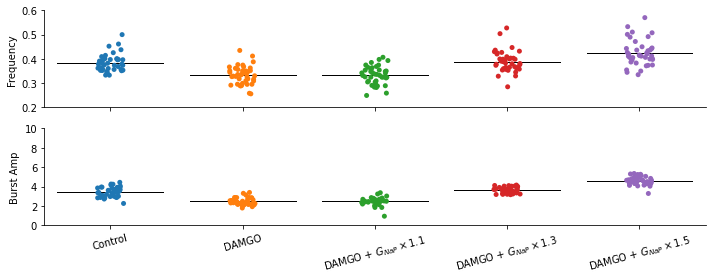

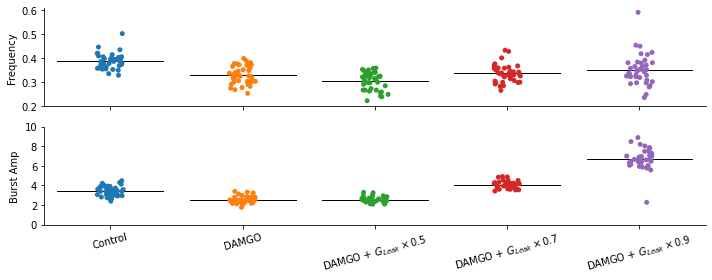

In [55]:
plot_freq_and_amp('gnap', 6)
plot_freq_and_amp('gleak', 7)

### Panel C

In [15]:
def plot_phase_diagrams(run_seed, pert='gnap'): 
#     f = plt.figure(figsize=(16,8))
#     f.tight_layout()
#     g = f.add_gridspec(2, 5)
    fig, ax = plt.subplots(2,5, figsize=(20,8))

    sign = '' if pert == 'gnap' else '-'
    fignum = 6 if pert == 'gnap' else 7
    term = r'$G_{NaP}$' if pert == 'gnap' else r'$G_{Leak}$'
    mults = [1.1, 1.3, 1.5] if pert == 'gnap' else [0.9, 0.7, 0.5]

    data_list = []
    with open(f'{path}/data/{pert}_synblock_pkls/clouds_pkls/seed{run_seed}-control_clouds_vars.pkl','rb') as fid:
        control_data = pickle.load(fid)

    with open(f'{path}/data/{pert}_synblock_pkls/clouds_pkls/seed{run_seed}-damgo_clouds_vars.pkl','rb') as fid:
        damgo_data = pickle.load(fid)
        
    with open(f'{path}/data/{pert}_synblock_pkls/clouds_pkls/seed{run_seed}-damgo_{pert}{sign}01_clouds_vars.pkl','rb') as fid:
        pert10_data = pickle.load(fid)
        
    with open(f'{path}/data/{pert}_synblock_pkls/clouds_pkls/seed{run_seed}-damgo_{pert}{sign}03_clouds_vars.pkl','rb') as fid:
        pert30_data = pickle.load(fid)
        
    with open(f'{path}/data/{pert}_synblock_pkls/clouds_pkls/seed{run_seed}-damgo_{pert}{sign}05_clouds_vars.pkl','rb') as fid:
        pert50_data = pickle.load(fid)

    with open(f'{path}/data/gnap_synblock_pkls/grid_pkls/control_grid_vars.pkl','rb') as fid:
        grid_control_data = pickle.load(fid)

    with open(f'{path}/data/gnap_synblock_pkls/grid_pkls/damgo_grid_vars.pkl','rb') as fid:
        grid_damgo_data = pickle.load(fid)
        
    ctrl_data_list = []
    ctrl_data_list.append([control_data, grid_control_data, 'Control', (0,0), 1])
    ctrl_data_list.append([damgo_data, grid_control_data, 'DAMGO', (0,1), 1])
    ctrl_data_list.append([pert10_data, grid_control_data, rf'DAMGO + {term} $\times$ {mults[0]}', (0,2), mults[0]])
    ctrl_data_list.append([pert30_data, grid_control_data, rf'DAMGO + {term} $\times$ {mults[1]}', (0,3), mults[1]])
    ctrl_data_list.append([pert50_data, grid_control_data, rf'DAMGO + {term} $\times$ {mults[2]}', (0,4), mults[2]])
    
    damgo_data_list = []
    damgo_data_list.append([control_data, grid_control_data, 'Control', (1,0), 1])
    damgo_data_list.append([damgo_data, grid_damgo_data, 'DAMGO', (1,1), 1])
    damgo_data_list.append([pert10_data, grid_damgo_data, rf'DAMGO + {term} $\times$ {mults[0]}', (1,2), mults[0]])
    damgo_data_list.append([pert30_data, grid_damgo_data, rf'DAMGO + {term} $\times$ {mults[1]}', (1,3), mults[1]])
    damgo_data_list.append([pert50_data, grid_damgo_data, rf'DAMGO + {term} $\times$ {mults[2]}', (1,4), mults[2]])
    
    i = 0
    for ctrl, damgo in zip(ctrl_data_list, damgo_data_list):
        for data in [ctrl, damgo]:
            neurons = data[0]['neurongroup']
            ts = data[0]['spikemonitor']['t']
            spike_idx = data[0]['spikemonitor']['i']
            train = bup.create_train(ts,spike_idx)
            cell_int, cell_class = bup.find_bursters_pk_ISI(train,300,)

            #state = data[1]['statemonitor']
            grid_neurons = data[1]['neurongroup']
            ts = data[1]['spikemonitor']['t']
            spike_idx = data[1]['spikemonitor']['i']
            train = bup.create_train(ts,spike_idx)
            grid_cell_int, grid_cell_class = bup.find_bursters_pk_ISI(train,400,)
            
    #       comment this loop to get rid of phase boundaries (in case we use Illustrator or Inkscape instead)
            for neuron in range(len(grid_cell_int)):
                x = grid_neurons['g_l'][neuron]/nS 
                y = grid_neurons['g_nap'][neuron]/nS 
                    
                if grid_cell_int[neuron] == 0:
                    #ax.plot(grid_neurons['g_l'][neuron]/nS, grid_neurons['g_nap'][neuron]/nS, c='tab:purple', alpha=0.3)
                    ax[data[3]].scatter(x,y, c='tab:purple', marker='s', s=225, alpha=0.3)

                if grid_cell_int[neuron] == 1:
                    #ax.plot(grid_neurons['g_l'][neuron]/nS, grid_neurons['g_nap'][neuron]/nS, c='gold', alpha=0.3)
                    ax[data[3]].scatter(x,y, c='gold', marker='s',s=225, alpha=0.3)

                if grid_cell_int[neuron] == 2:
                    #ax.plot(grid_neurons['g_l'][neuron]/nS, grid_neurons['g_nap'][neuron]/nS, c='tab:cyan', alpha=0.3)
                    ax[data[3]].scatter(x,y, c='tab:cyan', marker='s',s=225, alpha=0.3)


            if data[3][0] == 0:
                for neuron in range(len(cell_int)):
                    if pert == 'gnap': 
                        x = neurons['g_l'][neuron]/nS
                        y = neurons['g_nap'][neuron]/nS * data[4]
                    else:
                        x = neurons['g_l'][neuron]/nS * data[4]
                        y = neurons['g_nap'][neuron]/nS 
                        
                    if (neuron >= 0 and neuron < 60) or neuron >= 180:
                        if cell_int[neuron] == 0:
                            ax[data[3]].scatter(x,y, c='tab:purple', edgecolor='k', alpha=0.7)

                        if cell_int[neuron] == 1:
                            ax[data[3]].scatter(x,y, c='gold', edgecolor='k', alpha=0.7)

                        if cell_int[neuron] == 2:
                            ax[data[3]].scatter(x,y, c='tab:cyan', edgecolor='k', alpha=0.7)
                
                ax[data[3]].set_title(data[2])
            
            else:
                for neuron in range(len(cell_int)):
                    if pert == 'gnap': 
                        x = neurons['g_l'][neuron]/nS
                        y = neurons['g_nap'][neuron]/nS * data[4]
                    else:
                        x = neurons['g_l'][neuron]/nS * data[4]
                        y = neurons['g_nap'][neuron]/nS 
                        
                    if neuron >= 60 and neuron < 180:
                        if cell_int[neuron] == 0:
                            ax[data[3]].scatter(x,y, c='tab:purple', edgecolor='k', alpha=0.7)

                        if cell_int[neuron] == 1:
                            ax[data[3]].scatter(x,y, c='gold', edgecolor='k', alpha=0.7)

                        if cell_int[neuron] == 2:
                            ax[data[3]].scatter(x,y, c='tab:cyan', edgecolor='k', alpha=0.7)

                ax[data[3]].set_title('')
                
            ax[data[3]].set_xlim(0.15,1.5)
            ax[data[3]].set_ylim(0.15,1.5)
            if data[3][1] == 0:
                ax[data[3]].set_ylabel(r'$G_{NaP} (nS)$')
            else:
                ax[data[3]].set_ylabel('')
                ax[data[3]].set_yticks([])
                
    ax[1,0].set_xlabel(r'$G_{Leak} (nS)$')
    
    plt.tight_layout()
    plt.savefig(f'fig{fignum}/fig{fignum}_{pert}_phase_diagrams.pdf')

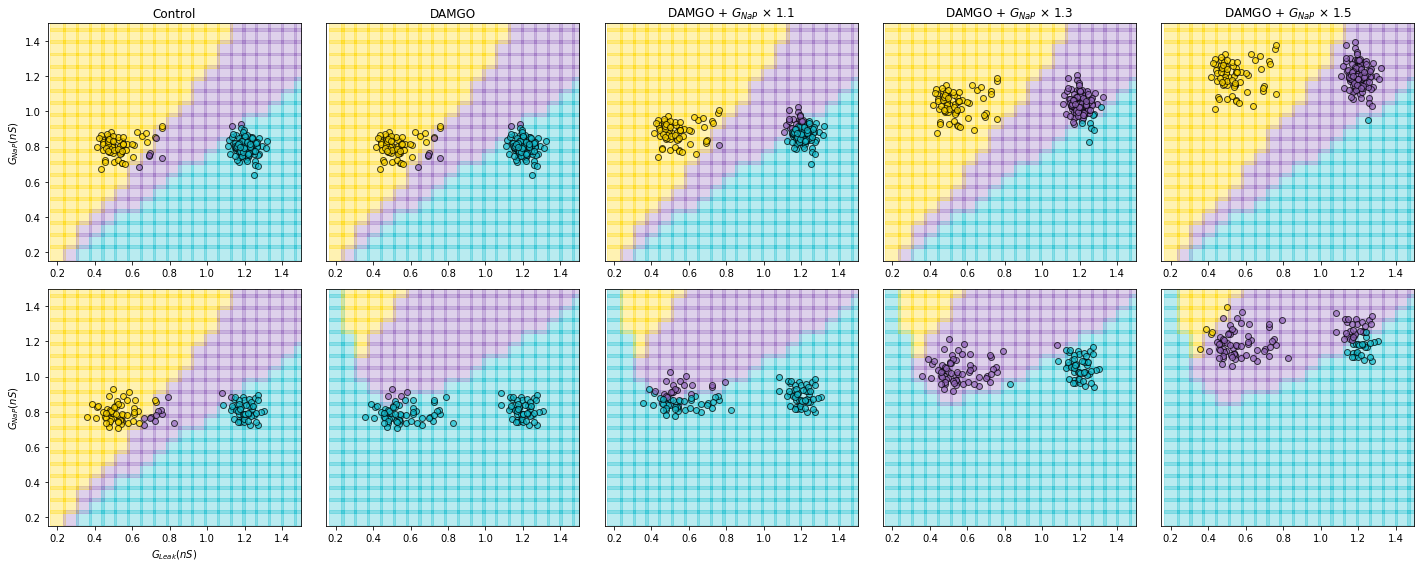

In [16]:
plot_phase_diagrams(run_seed=5, pert='gnap')

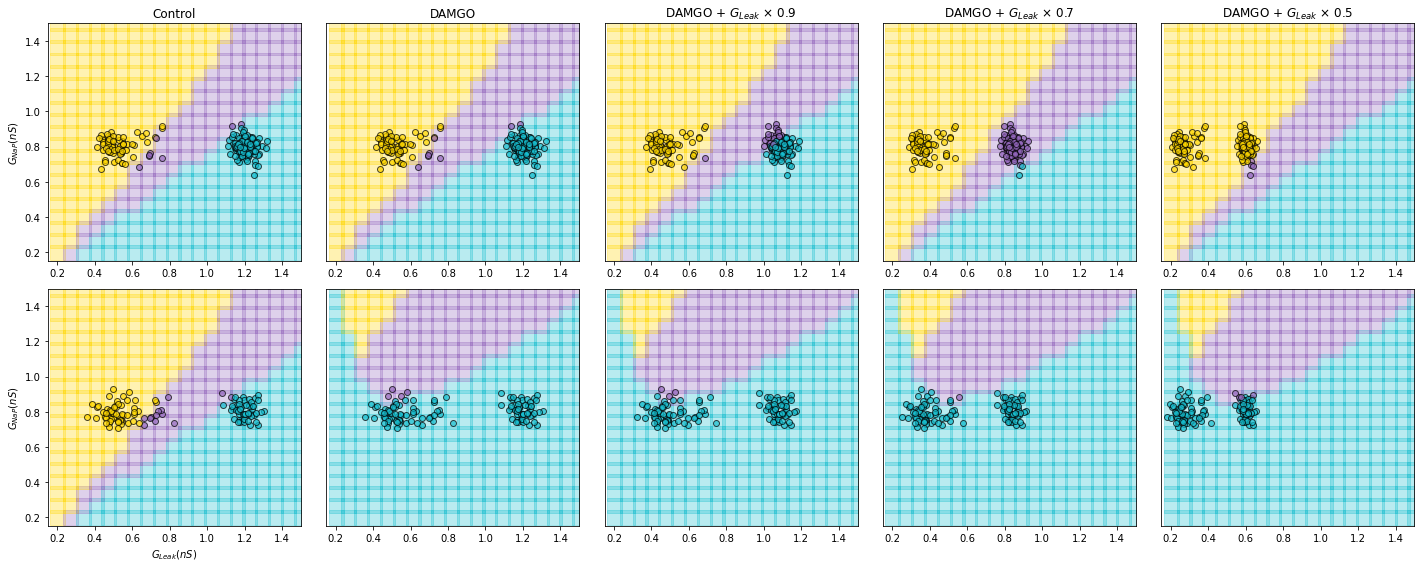

In [17]:
plot_phase_diagrams(run_seed=5, pert='gleak')

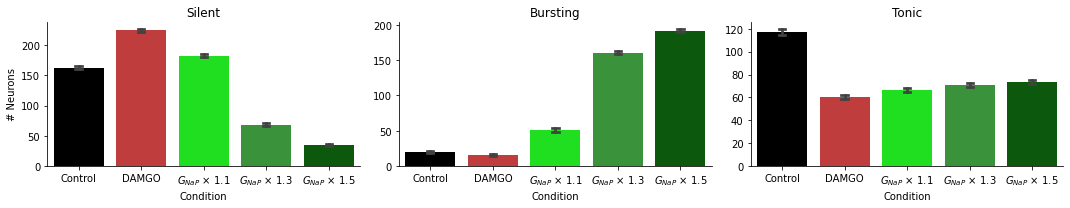

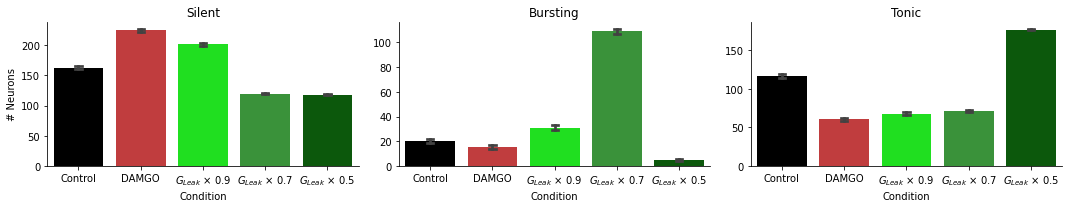

In [56]:
def plot_tbq_counts(pert):
    counts = pd.read_csv(f'{path}/{pert}_mod_sim/{pert}_mod_tbq_counts.csv')
    
    term = r'$G_{NaP}$' if pert == 'gnap' else r'$G_{Leak}$'
    mults = [1.1, 1.3, 1.5] if pert == 'gnap' else [0.9, 0.7, 0.5]
    fignum = 6 if pert == 'gnap' else 7

    tonic_list = []
    tonic_counts = [col for col in counts.columns if 'tonic' in col]
    for count in tonic_counts:
        tonic_list.append(counts[count])

    burst_list = []
    burst_counts = [col for col in counts.columns if 'bursting' in col]
    for count in burst_counts:
        burst_list.append(counts[count])

    silent_list = []
    silent_counts = [col for col in counts.columns if 'quiescent' in col]
    for count in silent_counts:
        silent_list.append(counts[count])

    tbq_df = pd.DataFrame({'# Silent': pd.concat(silent_list), '# Bursting': pd.concat(burst_list), '# Tonic': pd.concat(tonic_list)})
    tbq_df['index'] = np.arange(1,201)
    tbq_df['Condition'] = np.nan
    tbq_df.loc[tbq_df['index'] <= 40, 'Condition'] = 'Control'
    tbq_df.loc[(tbq_df['index'] > 40) & (tbq_df['index'] <= 80), 'Condition'] = 'DAMGO'
    tbq_df.loc[(tbq_df['index'] > 80) & (tbq_df['index'] <= 120), 'Condition'] = rf'{term} $\times$ ${mults[0]}$'
    tbq_df.loc[(tbq_df['index'] > 120) & (tbq_df['index'] <= 160), 'Condition'] = rf'{term} $\times$ ${mults[1]}$'
    tbq_df.loc[(tbq_df['index'] > 160) & (tbq_df['index'] <= 200), 'Condition'] = rf'{term} $\times$ ${mults[2]}$'

    fig, ax = plt.subplots(1,3, figsize=(15,3), sharex=True)
    cmap = ['k', 'tab:red', 'lime', 'tab:green', 'darkgreen']
    sns.barplot(data=tbq_df, x='Condition', y='# Silent', ax=ax[0], capsize=0.1, palette=cmap)
    sns.barplot(data=tbq_df, x='Condition', y='# Bursting', ax=ax[1], capsize=0.1, palette=cmap)
    sns.barplot(data=tbq_df, x='Condition', y='# Tonic', ax=ax[2], capsize=0.1, palette=cmap)
    
    for i in range(3):
        #ax[i].set_xticklabels(ax[i].get_xticks(), rotation=45)
        ax[i].set_ylabel('')
        ax[i].spines['top'].set_visible(False)
        ax[i].spines['right'].set_visible(False)
        
    ax[0].set_ylabel('# Neurons')
    ax[0].set_title('Silent')
    ax[1].set_title('Bursting')
    ax[2].set_title('Tonic')
    
    plt.tight_layout()
    plt.savefig(f'{fignum}/fig{fignum}_tbq_barplots.pdf')
    
    return tbq_df
    
gnap_tbq_df = plot_tbq_counts('gnap')
gleak_tbq_df = plot_tbq_counts('gleak')